# <span style="color: blue;">Project </span><span style="color: yellow; font-weight: bold;">The science of perception and knowledge</span>

### <span style="color: Purple  ; font-weight: bold;">Mohammed<span style="color: yellow ;"> &</span> Hazem </span> 

<h1 style="text-align: center; color: #0d79f5; font-weight: bold;">
📊 Gaza Aid Intelligence
</h1>

<h2 style="text-align: center; color: #0cec14;">
Real-Time Monitoring & Predictive Analytics
</h2>

<h3 style="text-align: center; color: #f36642; font-weight: bold;">
For Humanitarian Supply Gaps
</h3>

_______________

______________

# <span style="color: red;">Step 1: </span><span style="color: green; font-weight: bold;">Import the necessary libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For dashboard
import streamlit as st

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

# <span style="color: red;">Step 2: </span><span style="color: green; font-weight: bold;"> Load the Dataset

In [3]:
file_path = "commodities-received-13.xlsx"

df = pd.read_excel(file_path)

print("Dataset Loaded Successfully ✅")
df.head(5)

Dataset Loaded Successfully ✅


,ID,No. of Trucks,Received Date,Data Source,Manifest of,Description of Cargo,Cargo Category,Status,Quantity,Units,Donating Country/ Organization,Donation Type,Crossing,Destination Recipient/ Partner,Data Period,Data Entry Type,Last Edited Time
0,75734,1,2025-01-16,UNRWA,Non-Manifest (2025-01-16),Food Parcels,Food Items,Received,22,Pallets,UNRWA,Humanitarian - UN,Kerem Shalom,UNRWA,Current Data (after Rafah Operation),New data,2025-01-19 12:02:00
1,75735,1,2025-01-16,UNRWA,Non-Manifest (2025-01-16),Food Parcels,Food Items,Received,38,Pallets,UNRWA,Humanitarian - UN,Kerem Shalom,UNRWA,Current Data (after Rafah Operation),New data,2025-01-19 12:02:00
2,75736,1,2025-01-16,UNRWA,Non-Manifest (2025-01-16),Food Parcels,Food Items,Received,16,Pallets,UNRWA,Humanitarian - UN,Kerem Shalom,UNRWA,Current Data (after Rafah Operation),New data,2025-01-19 12:02:00
3,75737,1,2025-01-16,UNRWA,Non-Manifest (2025-01-16),Food Parcels,Food Items,Received,40,Pallets,UNRWA,Humanitarian - UN,Kerem Shalom,UNRWA,Current Data (after Rafah Operation),New data,2025-01-19 12:02:00
4,75738,1,2025-01-16,UNRWA,Non-Manifest (2025-01-16),Food Parcels,Food Items,Received,44,Pallets,UNRWA,Humanitarian - UN,Kerem Shalom,UNRWA,Current Data (after Rafah Operation),New data,2025-01-19 11:51:26


# <span style="color: red;">Step 3: </span><span style="color: green; font-weight: bold;"> Data Cleaning & Preprocessing

In [5]:
# Convert date column to datetime
df["Received Date"] = pd.to_datetime(df["Received Date"], errors="coerce")

# Fill missing values
df["Cargo Category"] = df["Cargo Category"].fillna("Unknown")
df["Quantity"] = pd.to_numeric(df["Quantity"], errors="coerce").fillna(0)

# Drop invalid dates
df = df.dropna(subset=["Received Date"])

print("Data Cleaned Successfully ✅")
df.info()

Data Cleaned Successfully ✅
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50059 entries, 0 to 50058
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   ID                              50059 non-null  int64         
 1   No. of Trucks                   50059 non-null  int64         
 2   Received Date                   50059 non-null  datetime64[ns]
 3   Data Source                     50059 non-null  object        
 4   Manifest of                     49472 non-null  object        
 5   Description of Cargo            50059 non-null  object        
 6   Cargo Category                  50059 non-null  object        
 7   Status                          50059 non-null  object        
 8   Quantity                        50059 non-null  int64         
 9   Units                           48922 non-null  object        
 10  Donating Country/ Organization  50054 non-

# <span style="color: red;">Step 4: </span><span style="color: green; font-weight: bold;"> Create Daily Aggregation

In [12]:
daily_data = df.groupby(
    ["Received Date", "Cargo Category"],
    as_index=False
).agg({
    "No. of Trucks": "sum",
    "Quantity": "sum"
})

daily_data.head()

,Received Date,Cargo Category,No. of Trucks,Quantity
0,2023-10-21,Food Items,7,157
1,2023-10-21,Medical Supplies,13,340
2,2023-10-22,Food Items,9,132
3,2023-10-22,Medical Supplies,1,24
4,2023-10-22,Mixed Items,5,97


# <span style="color: red;">Step 5: </span><span style="color: green; font-weight: bold;"> Visualize Aid Distribution

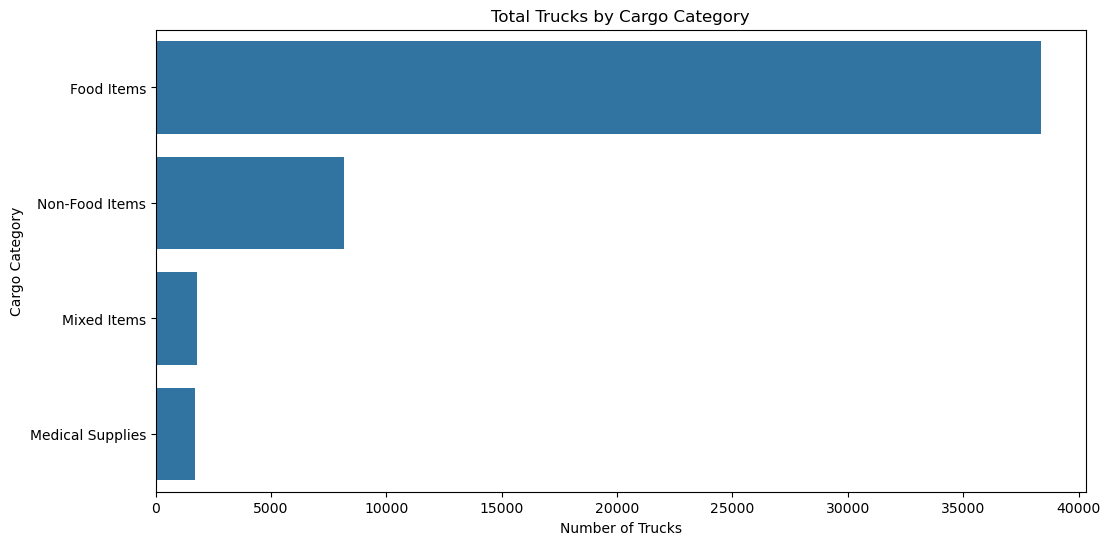

In [13]:
# Step 5: Visualize Aid Distribution

plt.figure(figsize=(12,6))

category_summary = daily_data.groupby("Cargo Category")["No. of Trucks"].sum().sort_values(ascending=False)

sns.barplot(x=category_summary.values, y=category_summary.index)

plt.title("Total Trucks by Cargo Category")
plt.xlabel("Number of Trucks")
plt.ylabel("Cargo Category")
plt.show()

# <span style="color: red;">Step 6: </span><span style="color: green; font-weight: bold;"> Supply Gap Calculation

In [14]:
required_trucks_per_day = 200  

food_data = daily_data[daily_data["Cargo Category"] == "Food Items"]

food_data = food_data.groupby("Received Date", as_index=False)["No. of Trucks"].sum()

food_data["Required"] = required_trucks_per_day
food_data["Gap"] = food_data["Required"] - food_data["No. of Trucks"]
food_data["Gap"] = food_data["Gap"].apply(lambda x: x if x > 0 else 0)

food_data.head()

,Received Date,No. of Trucks,Required,Gap
0,2023-10-21,7,200,193
1,2023-10-22,9,200,191
2,2023-10-23,11,200,189
3,2023-10-24,7,200,193
4,2023-10-26,12,200,188


# <span style="color:red;">Step 7:</span> <span style="color:green;font-weight:bold;">Predict Future Aid Flow (Holt-Winters Forecasting)</span>

In [32]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing

FILE_PATH = "commodities-received-13.xlsx"

df = pd.read_excel(FILE_PATH)

df["Received Date"] = pd.to_datetime(df["Received Date"], errors="coerce")
df["No. of Trucks"] = pd.to_numeric(df["No. of Trucks"], errors="coerce").fillna(0)
df = df.dropna(subset=["Received Date"])

daily = (df.groupby("Received Date", as_index=False)
           .agg(trucks=("No. of Trucks", "sum"))
           .rename(columns={"Received Date":"ds"}))

ts_trucks = daily.set_index("ds")["trucks"].asfreq("D").fillna(0)

model = ExponentialSmoothing(
    ts_trucks,
    trend="add",
    seasonal="add",
    seasonal_periods=7
).fit()

forecast_days = 21
forecast = model.forecast(forecast_days).clip(lower=0)

forecast.head()

2025-01-17     0.000000
2025-01-18     0.000000
2025-01-19     0.000000
2025-01-20    13.265740
2025-01-21     3.985303
Freq: D, dtype: float64

# <span style="color:red;">Step 8:</span> <span style="color:green;font-weight:bold;">Create Forecast Table & Supply Gap</span>

In [33]:
required_per_day = 200

forecast_df = pd.DataFrame({
    "date": forecast.index,
    "forecast_trucks": forecast.values
})

forecast_df["required"] = required_per_day
forecast_df["gap"] = (
    forecast_df["required"] - forecast_df["forecast_trucks"]
).clip(lower=0)

forecast_df.head(10)

,date,forecast_trucks,required,gap
0,2025-01-17,0.000000,200,200.000000
1,2025-01-18,0.000000,200,200.000000
2,2025-01-19,0.000000,200,200.000000
3,2025-01-20,13.265740,200,186.734260
4,2025-01-21,3.985303,200,196.014697
5,2025-01-22,13.950615,200,186.049385
6,2025-01-23,11.480824,200,188.519176
7,2025-01-24,0.000000,200,200.000000
8,2025-01-25,0.000000,200,200.000000
9,2025-01-26,0.000000,200,200.000000


# <span style="color:red;">Step 9:</span> <span style="color:green;font-weight:bold;">Evaluate Forecast Accuracy (MAE & MAPE)</span>

In [34]:
from sklearn.metrics import mean_absolute_error

test_days = 21

train = ts_trucks.iloc[:-test_days]
test = ts_trucks.iloc[-test_days:]

m = ExponentialSmoothing(
    train,
    trend="add",
    seasonal="add",
    seasonal_periods=7
).fit()

pred = m.forecast(test_days).clip(lower=0)

mae = mean_absolute_error(test, pred)
mape = (np.abs(test - pred) / np.maximum(test, 1)).mean() * 100

print("MAE:", round(mae, 2))
print("MAPE:", round(mape, 2), "%")

MAE: 45.88
MAPE: 1980.44 %


# <span style="color:red;">Step 10:</span> <span style="color:green;font-weight:bold;">Detect Anomalies in Aid Flow</span>

In [35]:
an = ts_trucks.to_frame("trucks").copy()

window = 14
an["mean"] = an["trucks"].rolling(window).mean()
an["std"] = an["trucks"].rolling(window).std()

an["z"] = (an["trucks"] - an["mean"]) / an["std"]

threshold = 2.5
an["anomaly"] = an["z"].abs() > threshold

an[an["anomaly"]].head(20)

,trucks,mean,std,z,anomaly
ds,,,,,
2023-11-24,200.0,64.428571,51.607564,2.626968,True


# <span style="color:red;">Step 11:</span> <span style="color:green;font-weight:bold;">Heatmap Analysis (Day × Week)</span>

In [36]:
import plotly.express as px

hm = ts_trucks.to_frame("trucks").copy()
hm["dow"] = hm.index.day_name()
hm["week"] = hm.index.to_period("W").astype(str)

pivot = hm.pivot_table(
    index="dow",
    columns="week",
    values="trucks",
    aggfunc="sum"
).fillna(0)

order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
pivot = pivot.reindex(order)

fig = px.imshow(
    pivot,
    aspect="auto",
    title="Heatmap: Trucks Volume"
)

fig.show()

# <span style="color:red;">Step 12:</span> <span style="color:green;font-weight:bold;">Cluster Days into Low / Medium / High Flow</span>

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

feat = ts_trucks.to_frame("trucks").copy()
feat["dow"] = feat.index.dayofweek
feat["month"] = feat.index.month
feat["is_weekend"] = (feat["dow"] >= 5).astype(int)

X = feat[["trucks","dow","month","is_weekend"]].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
feat["cluster"] = kmeans.fit_predict(X_scaled)

cluster_order = feat.groupby("cluster")["trucks"].mean().sort_values().index.tolist()
mapping = {
    cluster_order[0]: "Low",
    cluster_order[1]: "Medium",
    cluster_order[2]: "High"
}

feat["flow_level"] = feat["cluster"].map(mapping)

feat[["trucks","flow_level"]].head(20)

,trucks,flow_level
ds,,
2023-10-21,20.0,Medium
2023-10-22,15.0,Medium
2023-10-23,20.0,Low
2023-10-24,8.0,Low
2023-10-25,0.0,Low
2023-10-26,12.0,Low
2023-10-27,10.0,Low
2023-10-28,0.0,Medium
2023-10-29,48.0,Medium


# <span style="color:red;">Step 13:</span> <span style="color:green;font-weight:bold;">Auto-generated Insights</span>

In [ ]:
avg_flow = ts_trucks.mean()

max_day = ts_trucks.idxmax()
max_value = ts_trucks.max()

min_day = ts_trucks.idxmin()
min_value = ts_trucks.min()

required = 200
gap_days_ratio = (ts_trucks < required).mean() * 100

trend = "increasing" if ts_trucks.iloc[-1] > ts_trucks.iloc[0] else "decreasing"

print("=== AUTO INSIGHTS ===")
print(f"Average daily trucks: {avg_flow:.1f}")
print(f"Highest flow: {max_value:.0f} trucks on {max_day.date()}")
print(f"Lowest flow: {min_value:.0f} trucks on {min_day.date()}")
print(f"Supply gap occurs on {gap_days_ratio:.1f}% of days")
print(f"Aid flow trend is {trend}")

=== AUTO INSIGHTS ===
Average daily trucks: 110.3
Highest flow: 340 trucks on 2024-05-03
Lowest flow: 0 trucks on 2023-10-25
Supply gap occurs on 88.8% of days
Aid flow trend is decreasing


# <span style="color:red;">Step 14:</span> <span style="color:green;font-weight:bold;">Risk Prediction — When Will Supply Gap Occur?</span>


In [39]:
required_per_day = 200

risk_df = forecast_df.copy()

risk_df["risk"] = risk_df["forecast_trucks"] < required_per_day

risk_days = risk_df[risk_df["risk"]]

print("Days with predicted supply risk:")
risk_days.head(20)

Days with predicted supply risk:


,date,forecast_trucks,required,gap,risk
0,2025-01-17,0.000000,200,200.000000,True
1,2025-01-18,0.000000,200,200.000000,True
2,2025-01-19,0.000000,200,200.000000,True
3,2025-01-20,13.265740,200,186.734260,True
4,2025-01-21,3.985303,200,196.014697,True
5,2025-01-22,13.950615,200,186.049385,True
6,2025-01-23,11.480824,200,188.519176,True
7,2025-01-24,0.000000,200,200.000000,True
8,2025-01-25,0.000000,200,200.000000,True
9,2025-01-26,0.000000,200,200.000000,True


In [41]:
if len(risk_days) > 0:
    print("First predicted shortage day:", risk_days.iloc[0]["date"])
else:
    print("No supply shortage predicted.")

First predicted shortage day: 2025-01-17 00:00:00


# <span style="color:red;">Step 15:</span> <span style="color:green;font-weight:bold;">Generate Automatic Text Report</span>

In [43]:
report_text = f"""
Gaza Aid Flow Analysis Report
___________________________________
Average Daily Trucks: {ts_trucks.mean():.1f}

Highest Aid Flow: {ts_trucks.max():.0f}
Date: {ts_trucks.idxmax().date()}

Lowest Aid Flow: {ts_trucks.min():.0f}
Date: {ts_trucks.idxmin().date()}

Forecast Horizon: {forecast_days} days
Required Trucks per Day: {required_per_day}

Days with Expected Supply Gap: {len(risk_days)}

Aid Flow Trend:
{"Increasing" if ts_trucks.iloc[-1] > ts_trucks.iloc[0] else "Decreasing"}
"""

print(report_text)


Gaza Aid Flow Analysis Report
___________________________________
Average Daily Trucks: 110.3

Highest Aid Flow: 340
Date: 2024-05-03

Lowest Aid Flow: 0
Date: 2023-10-25

Forecast Horizon: 21 days
Required Trucks per Day: 200

Days with Expected Supply Gap: 21

Aid Flow Trend:
Decreasing



_______________

_____________

# ✔✔